# IMPORT LIBRARIES

Importing necessary libraries

In [31]:
import networkx as nx
import json
import random
import math
import matplotlib.pyplot as plt
import heapq

# Representation of Graph

The below two cells is just for practice purpose of the graph representation in pythom

In [32]:
# n, m = map(int, input().split())

# graph = []
# for i in range(n):
#   graph.append([])

# for i in range(m):
#   node1, node2, edgeWeight = map(int, input().split())
#   graph[node1].append([node2, edgeWeight])
#   graph[node2].append([node1, edgeWeight])

# for i in range(5):
#   print(graph[i])

In [33]:
# n,m = map(int,input().split())

# graph = {}
# city=list(input().split())
# for i in range(n):
#   graph[city[i]]=[]

# for i in range(m):
#   city1, city2, distance = tuple(input().split())
#   distance = int(distance)
#   graph[city1].append([city2,distance])
#   graph[city2].append([city1,distance])

# for c in city:
#   print(c, "->", graph[c])


# Dijkstra Methodology

## Dijkstra Algorithm

Main Dijkstra Algorithm returning distance and parent list

In [34]:
def dijkstra (adjacency,start):
  distance = [
      float('inf') for node in adjacency
  ]
  parent=[
      None for node in adjacency
  ]
  pq = [(0,start)]
  distance[start]=0

  while pq:
    current_distance, node= heapq.heappop(pq)

    if distance[node] < current_distance:
      continue

    for neighbour, weight in adjacency[node]:
      if current_distance + weight < distance[neighbour]:
         distance[neighbour]= distance[node]+weight
         parent[neighbour] = node
         heapq.heappush(pq,(distance[neighbour],neighbour))
  return distance, parent

## Next Destination

next_destination function returns the shortest path from the start node to the target node, the node next to it in the path and the weight to that node

In [35]:
def next_destination(adj, target, start):
  # Handling the edge case
  if start==target:
    return start, 0, []

  distance, parent = dijkstra(adj,start)
  current=target

  path = []
  # This while loop starts from target node and goes till start node by using parent list
  while(parent[current]!=start):
    path.append(current)
    current=parent[current]
  path.append(current)

  # Reverse the path list because we added node in reverse order
  path = path[::-1]
  return current, distance[current], path

TRIAL RUN

In [36]:
adj={
  0: [[1, 1], [4, 1]],
  1: [[0, 1], [3, 2], [2, 3]],
  2: [[1, 3], [3, 4], [4, 2]],
  3: [[0, 5], [1, 2], [2, 4]],
  4: [[0, 1], [2, 2]]
}

start=0
target=3
next_node, next_distance, path= next_destination(adj, target, start)
print('The node closest to Node', start ,'in it\'s shortest path to Node', target ,'is Node', next_node ,'at a distance of', next_distance ,'units')
print('Path: ',path)

The node closest to Node 0 in it's shortest path to Node 3 is Node 1 at a distance of 1 units
Path:  [1, 3]


# GRAPH LOADING

To use this, kindly upload "graph_with_metadata.json" in google drive and give path to the Google Drive to upload

In [37]:
from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/MyDrive/Coding Assignment/graph_with_metadata.json"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
def load_graph(filename="graph_with_metadata.json"):
  with open(filename, "r") as f:
    data = json.load(f)

  # Convert adjacency dict keys to int and neighbor node IDs to int
  adjacency_raw = data["adjacency"]
  adjacency = {int(k): [(int(n), w) for n, w in v] for k, v in adjacency_raw.items()}
  positions = {int(k): tuple(v) for k, v in data["positions"].items()}
  metadata = data.get("metadata", {})
  end_nodes_loaded = metadata.get("exit_nodes", [])
  exit_nodes = end_nodes_loaded[1:]

  # Reconstruct directed graph
  G_loaded = nx.DiGraph()
  for node, neighbors in adjacency.items():
    for nbr, weight in neighbors:
      G_loaded.add_edge(node, nbr, weight=weight)
  # print(f"Graph successfully reloaded from '{filename}'")
  # print(f"Metadata: {metadata}")
  return G_loaded, adjacency, positions, metadata, exit_nodes

In [39]:
G_loaded, adjacency, positions, metadata, exit_nodes= load_graph(filename)
copy_adjacency=adjacency

## VISUALIZATION OF THE DENSE NETWORK

  Just a visual representation of the density of edges in the nodes without actual coordinates given by positions (x,y)

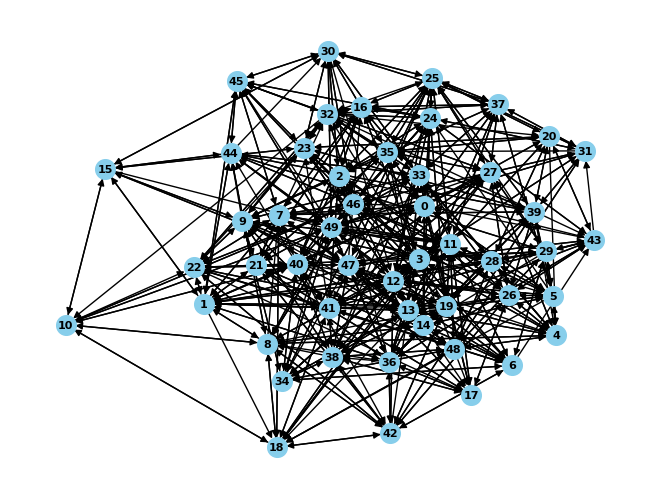

In [40]:
nx.draw(G_loaded, with_labels=True, node_color='skyblue', node_size=200, font_size=8,font_weight='bold')

In [41]:
print(G_loaded)

DiGraph with 50 nodes and 641 edges


In [42]:
adjacency

{0: [(1, 3.615613090421676),
  (5, 6.625588434700766),
  (7, 8.387065516904016),
  (12, 8.632105032847283),
  (14, 11.010721135829431),
  (17, 5.839529905596517),
  (20, 6.3315004314407854),
  (25, 4.708417466557369),
  (27, 9.937464151011712),
  (32, 10.343773728733895),
  (35, 8.218915433044794),
  (37, 7.001446819014501),
  (40, 6.941684778875453),
  (46, 9.42042666110979),
  (49, 14.483802997330525)],
 1: [(0, 3.4305638723147016),
  (7, 5.5452272930747535),
  (8, 3.687762785299875),
  (11, 0.8953878742731045),
  (12, 7.30313971503368),
  (13, 2.0875640530027133),
  (15, 7.810318634686391),
  (18, 6.943799461359042),
  (19, 5.2869235826143335),
  (21, 0.8182607603299563),
  (22, 1.986641228176235),
  (36, 5.588633178236137),
  (40, 2.420737930681833),
  (41, 6.072775725878443),
  (44, 2.5736652341331863),
  (45, 3.9742488129020943)],
 2: [(3, 6.310645556884938),
  (9, 6.5350808395869455),
  (11, 6.794691813368499),
  (13, 7.710952343836278),
  (16, 2.833993438221319),
  (24, 3.72864

In [43]:
positions

{0: (0.6394267984578837, 0.025010755222666936),
 1: (3.4752638653220735, 2.2321073814882277),
 2: (7.628240927476112, 6.766994874229113),
 3: (9.029616109343609, 0.8693883262941615),
 4: (4.797296377167434, 0.29797219438070344),
 5: (2.9677417732324303, 5.053552881033624),
 6: (1.2388237271547726, 1.988376506866485),
 7: (6.848959940015709, 5.449414806032166),
 8: (2.9839655983662703, 5.892656838759088),
 9: (8.28487411010044, 0.06498759678061017),
 10: (8.25237326649527, 6.981393949882269),
 11: (4.062254648661927, 1.5547949981178155),
 12: (9.614917649861031, 3.365945451126268),
 13: (1.834712590421331, 0.9671637683346401),
 14: (8.62744929712714, 6.037260313668911),
 15: (8.264154459469422, 7.297317866938179),
 16: (5.826052823092307, 9.731157639793706),
 17: (4.406809394875181, 5.52040631273227),
 18: (8.464641978276955, 6.185197523642461),
 19: (8.755362102796994, 5.77352145256762),
 20: (7.341146525934311, 0.45824383655662215),
 21: (3.0510844808639215, 2.8938796360210715),
 22: 

In [44]:
metadata

{'n_nodes': 50,
 'p': 0.2,
 'traffic_min': 0.8,
 'traffic_max': 1.2,
 'directed_ratio': 0.2,
 'description': 'Synthetic city map with directed and undirected roads',
 'exit_nodes': [0, 48]}

In [45]:
exit_nodes

[48]

# SIMULATION

Example Test Case

In [46]:
# adjacency={
#   0: [[2, 5]],
#   1: [[2, 2]],
#   2: [[0, 5], [1, 2], [3, 4]],
#   3: [[2, 4], [4, 5]],
#   4: [[3, 5]]
# }

# CarA = 0
# ExitA = 4
# CarB = 3
# Caught = 0
# Reached = False
# runningA = 0
# runningB = 0
# SpeedB = 1.5
# SpeedA = 1.0
# isnodeA = True
# isnodeB = False
# pathA = []
# pathB = []
# Next_A, Nextdistance_A, pathA = next_destination(adjacency, ExitA, CarA)
# Next_B = CarB
# Nextdistance_B = 0
# events =[]

## SIMULATION PARAMETERS

Defining parameters which will define our simulation at each step

In [47]:
CarA = 0                                                                        # Position of CarA (Thief)
ExitA = 48                                                                      # Exit node for CarA
CarB = 49                                                                       # Position of CarB (Police)
Caught = 0                                                                      # O for Not caught, 1 for caught at a node, 2 for caught on an edge
Reached = False                                                                 # True for Car A reach Exit node as well as didn't get Caught else False
runningA = 0                                                                    # The time unit since A left the last node
runningB = 0                                                                    # The time unit since B left the last node
SpeedB = 1.5                                                                    # Speed of Car B
SpeedA = 1.0                                                                    # Speed of Car A
isnodeA = True                                                                  # True when Car A is at a node or False when it is in between
isnodeB = True                                                                  # True when Car B is at a node or False when it is in between
pathA = []                                                                      # Dijkstra path which A will follow
pathB = []                                                                      # Dijkstra path which B will follow
Next_A, Nextdistance_A, pathA = next_destination(adjacency, ExitA, CarA)        # Next_A stores the node to where CarA need to move now and Nextdistance_A is the corresponding distance
Next_B = CarB                                                                   # Next_B stores the node to where CarB need to move now
Nextdistance_B = 0                                                              # Nextdistance_B is the corresponding distance to the node it needs to move next
events =[]                                                                      # Stores the random events happening

It generate a 2D- Matrix with 0/1 entries. Value(i,j) = 0 means there is no egde from node i to node j and if it is 1 then it means there is an edge from node i to node j. This is just for each of implementation of One Way Event

In [48]:
def generate_adjacency_matrix(adjacency):
    n = len(adjacency)
    matrix = [[0]*n for _ in range(n)]

    for u in adjacency:
        for v, w in adjacency[u]:
            matrix[u][v] = 1

    return matrix
adjacency_matrix = generate_adjacency_matrix(adjacency)
# print(adjacency_matrix)

## GENERATE RANDOM EVENT

Generates Random Event based on the 0.3 probability and also return a dictionary for each event which stores the type, nodes, edge weight, duration of the event and start step of the event.

In [49]:
def generate_random_event(adjacency,events,step):
    r = random.random()

    # When the random value is <0.3 (Probability of random event = 0.3 )
    if r < 0.3:
        random_events = ["Traffic Jam", "Blockage", "One-way"]
        choice = random.choice(random_events)
        # print("Selected event:", choice)
        if choice == "Traffic Jam":
            # Choose a random node and then a random edge going out from it. Change the weight of that edge by a factor of 2 in the adjacecny list
            node1 = random.choice(list(adjacency.keys()))
            node2, weight = random.choice(adjacency[node1])
            new_weight = weight*2
            for i, (neighbour, wt) in enumerate(adjacency[node1]):
                if neighbour == node2:
                    adjacency[node1][i] = (node2, new_weight)
                    break
            duration = 3
            event={
                "type": "Traffic Jam",
                "node1": node1,
                "node2": node2,
                "weight": weight,
                "duration": duration,
                "start_step":step
            }
            events.append(event)
            # print(event)

        elif choice == "Blockage":
            # Choose a random node and then a random edge going out from it. Remove that edge from the adjacency list
            node1 = random.choice(list(adjacency.keys()))
            node2, weight = random.choice(adjacency[node1])
            adjacency[node1] = [(neighbour, wt) for neighbour, wt in adjacency[node1] if neighbour != node2]
            duration = 4
            event={
                "type": "Blockage",
                "node1": node1,
                "node2": node2,
                "weight": weight,
                "duration": duration,
                "start_step":step
            }
            events.append(event)
            # print(event)
        else:
            # Choose a random node (node1) and then a random edge going out from it to node2. Loop until there also exist a reverse edge from node2 to node1
            # This ensures that the road is 2 way and we are removing only one edge of it
            node1 = random.choice(list(adjacency.keys()))
            node2, weight = random.choice(adjacency[node1])
            while True:
                node1 = random.choice(list(adjacency.keys()))
                if len(adjacency[node1]) == 0:
                    continue
                node2, weight = random.choice(adjacency[node1])
                if adjacency_matrix[node2][node1] == 1:
                    break
            adjacency[node1] = [(neighbour, wt) for neighbour, wt in adjacency[node1] if neighbour != node2]
            duration = 6
            event={
                "type": "One-way",
                "node1": node1,
                "node2": node2,
                "weight": weight,
                "duration": duration,
                "start_step":step
            }
            events.append(event)
            # print(event)

    return adjacency, events

## RESOLVE EXPIRED EVENTS

The resolve_expired_events() will resolve all the events based on the duration of the event and the start step of the event. It will also re-add or we-adjust the weight of the edge which was disturbed due to Traffic Jam, Blockage and One-Way road

In [50]:
def resolve_expired_events(adjacency, events, step):
    # Made this new list because we can't remove the event while iterating on events as it might cause issues
    updated_events = []

    for event in events:
        node1 = event["node1"]
        node2 = event["node2"]
        weight = event["weight"]
        # If the event is to end in the present time step
        if step == event["start_step"] + event["duration"]:
            if event["type"]=="Traffic Jam":
                # When the event is Traffic Jam, we just reassign edge we changed previously
                for i, (neighbour, wt) in enumerate(adjacency[node1]):
                    if neighbour == node2:
                        adjacency[node1][i] = (node2, weight)
                        break
            elif event["type"]=="Blockage":
                # When the event is blockage, we just append the edge we removed previously
                adjacency[node1].append((node2,weight))
            else:
                # When the event is one way, we just append the edge out of the two edges we removed previously
                adjacency[node1].append((node2,weight))
        else:
            updated_events.append(event)

    return adjacency, updated_events

## RECOMPUTE PATH

Whenever the dynamics of the graph changes then there may occur instances where the Car A and Car B need to recalculate the path for optimal traversal in shortest distance and as per the Dijkstra Path to the desired node also changes

In [51]:
def recompute_path(isnodeA, isnodeB, CarA, CarB, Next_A, Next_B, Nextdistance_A, Nextdistance_B, pathA, pathB, adjacency):
    # Recalculate the path only when the nodes are at a node in the current step. If Car is not at node then no use of recomputing path because it will anyways follow the one it i
    if isnodeA and isnodeB:
          Next_A, Nextdistance_A, pathA = next_destination(adjacency, ExitA, CarA)
          Next_B, Nextdistance_B, pathB = next_destination(adjacency, CarA, CarB)
          return Next_A, Next_B, Nextdistance_A, Nextdistance_B, pathA, pathB
    elif isnodeA:
          Next_A, Nextdistance_A, pathA = next_destination(adjacency, ExitA, CarA)
          return Next_A, Next_B, Nextdistance_A, Nextdistance_B, pathA, pathB
    elif isnodeB:
          Next_B, Nextdistance_B, pathB = next_destination(adjacency, Next_A, CarB)
          return Next_A, Next_B, Nextdistance_A, Nextdistance_B, pathA, pathB
    else:
          return Next_A, Next_B, Nextdistance_A, Nextdistance_B, pathA, pathB

The print_status() function prints the status of Car A and Car B for each step based on whether the Car is at a node or on an edge

In [52]:
def print_status(isnodeA, isnode):
    if isnodeA and isnodeB:
          print("At t =", step, "Car A is at", CarA, "and Car B is at", CarB)
    elif isnodeA:
          print("At t =", step, "Car A is at", CarA, "and Car B is moving from",CarB, "to", Next_B)
    elif isnodeB:
          print("At t =", step, "Car A is moving from", CarA, "to", Next_A, "and Car B is at", CarB)
    else:
          print("At t =", step, "Car A is moving from", CarA, "to", Next_A, "and Car B is moving from", CarB, "to", Next_B)

## LOG HISTORY AND HELPER FUNCTION

modify() is a helper function to generate the log_history[] which is to be saved as JSON file at the very end of the simulation

In [53]:
def modify(events,step):
    updated_events = []
    for event in events:
        e={
              "type": event["type"],
              "edge": [event["node1"],event["node2"]],
              "steps": event["duration"]-(step-event["start_step"])
        }
        updated_events.append(e)
    return updated_events


This is the main function which generates the desired log history. Previously I made a list of events but this function modifies exactly to the type the log history was asked

In [54]:
history = []
def log_history(history, step, carA, carB, Next_A, Next_B, runningA, runningB, speedA, speedB, pathA, pathB, Caught, Reached, events):
    history.append({
        "step": step,

        "carA": {
            "pos": carA,
            "edge_from": None if (Caught or Reached) else carA,
            "edge_to": None if (Caught or Reached) else Next_A,
            "progress": runningA * speedA,
            "Dijkstra_path": pathA,
        },

        "carB": {
            "pos": carB,
            "edge_from": None if (step < 3 or Caught or Reached) else carB,
            "edge_to": None if (step <3 or Caught or Reached) else Next_B,
            "progress": runningB * speedB,
            "Dijkstra_path": [] if step <3 else pathB,
        },

        "caught": (Caught != 0),
        "reached": Reached,
        "log_events": modify(events,step)
    })
    return history

## MAIN SIMULATION CELL

Flow for each step:


*   Check whether Car A is at node or on an edge and same for Car B
*   Check if Car A reached or Caught by Car B
*   Generate Random Event
*   Resolve Expired Events
*   Recompute Path based on Dijkstra Algorithm
*   Append the info of this step to the simulation log

In [55]:
for step in range(50):

    # A reached a node at or before step'th unit time
    if Nextdistance_A <= runningA * SpeedA:
        CarA = Next_A
        runningA = 0
        # When Car A reached the Exit
        if CarA == ExitA:
            Reached = True

        Next_A, Nextdistance_A, pathA = next_destination(adjacency, ExitA, CarA)
        # B also reached a node at or before step'th unit time
        if Nextdistance_B <= runningB * SpeedB:
            CarB = Next_B
            runningB = 0
            # When both Car A and Car B reached the same node at step'th unit time
            if CarB == CarA and step>=3:
                Caught = 1
                Reached = False

            Next_B, Nextdistance_B, pathB = next_destination(adjacency, CarA, CarB)
        else:
            if CarA == Next_B and (Nextdistance_B - runningB * SpeedB)<0.5 and step>=3:
              Caught = 1


    # A didn't reach a node and is still in between an edge at step'th time unit
    else:
        # B also reached a node at or before step'th unit time
        if Nextdistance_B <= runningB * SpeedB:
            CarB = Next_B
            runningB = 0
            Next_B, Nextdistance_B, pathB = next_destination(adjacency, Next_A, CarB)
        # B didn't reach a node and is still in between an edge at step'th time unit
        else:
            if CarA == CarB and Next_A == Next_B and abs(runningA*SpeedA - runningB*SpeedB)<0.5 and step>=3:
                Caught = 2

    if step <= 3:
      runningB = 0

    if runningA == 0:
      isnodeA = True
    else:
      isnodeA = False
    if runningB == 0:
      isnodeB = True
    else:
      isnodeB = False

    # Generate Random Events
    adjacency, events = generate_random_event(adjacency, events, step)

    # Resolve Expired Events
    adjacency, events = resolve_expired_events(adjacency, events, step)

    # Recompute Path
    Next_A, Next_B, Nextdistance_A, Nextdistance_B, pathA, pathB = recompute_path(isnodeA, isnodeB, CarA, CarB, Next_A, Next_B, Nextdistance_A, Nextdistance_B, pathA, pathB, adjacency)

    # Log File
    history = log_history(history, step, CarA, CarB, Next_A, Next_B, runningA, runningB, SpeedA, SpeedB, pathA, pathB, Caught, Reached, events)

    print_status(isnodeA, isnodeB)

    # Break the loop if CarA reached the Exit or CarB caught CarA
    if Reached == True or Caught != 0:
      break;

    # Update the run time since the last node for each CarA and CarB
    runningA = runningA + 1
    runningB = runningB + 1

At t = 0 Car A is at 0 and Car B is at 49
At t = 1 Car A is moving from 0 to 1 and Car B is at 49
At t = 2 Car A is moving from 0 to 1 and Car B is at 49
At t = 3 Car A is moving from 0 to 1 and Car B is at 49
At t = 4 Car A is at 1 and Car B is moving from 49 to 8
At t = 5 Car A is moving from 1 to 40 and Car B is moving from 49 to 8
At t = 6 Car A is moving from 1 to 40 and Car B is moving from 49 to 8
At t = 7 Car A is at 40 and Car B is moving from 49 to 8
At t = 8 Car A is moving from 40 to 38 and Car B is at 8
At t = 9 Car A is moving from 40 to 38 and Car B is moving from 8 to 14
At t = 10 Car A is moving from 40 to 38 and Car B is moving from 8 to 14
At t = 11 Car A is at 38 and Car B is moving from 8 to 14
At t = 12 Car A is moving from 38 to 48 and Car B is at 14
At t = 13 Car A is at 48 and Car B is at 48


## RESULT

In [56]:
if Reached:
    print('Car A reached exit',ExitA,'first! The burglars vanish like thin air...')
elif Caught == 1:
    print('Car B caught Car A at node',CarA,'! Paris Police!! Saviour of the Louvre !!!')
elif Caught == 2:
    print('Car B caught Car A on edge between node',CarA,'and node',Next_A,'! Paris Police!! Saviour of the Louvre !!!')
else:
    print('Paris! The Great Maze!!')

Car B caught Car A at node 48 ! Paris Police!! Saviour of the Louvre !!!


# Output Simulation LOG

Printing the Simulation Log

In [57]:
history

[{'step': 0,
  'carA': {'pos': 0,
   'edge_from': 0,
   'edge_to': 1,
   'progress': 0.0,
   'Dijkstra_path': [1, 40, 38, 48]},
  'carB': {'pos': 49,
   'edge_from': None,
   'edge_to': None,
   'progress': 0.0,
   'Dijkstra_path': []},
  'caught': False,
  'reached': False,
  'log_events': []},
 {'step': 1,
  'carA': {'pos': 0,
   'edge_from': 0,
   'edge_to': 1,
   'progress': 1.0,
   'Dijkstra_path': [1, 40, 38, 48]},
  'carB': {'pos': 49,
   'edge_from': None,
   'edge_to': None,
   'progress': 0.0,
   'Dijkstra_path': []},
  'caught': False,
  'reached': False,
  'log_events': []},
 {'step': 2,
  'carA': {'pos': 0,
   'edge_from': 0,
   'edge_to': 1,
   'progress': 2.0,
   'Dijkstra_path': [1, 40, 38, 48]},
  'carB': {'pos': 49,
   'edge_from': None,
   'edge_to': None,
   'progress': 0.0,
   'Dijkstra_path': []},
  'caught': False,
  'reached': False,
  'log_events': []},
 {'step': 3,
  'carA': {'pos': 0,
   'edge_from': 0,
   'edge_to': 1,
   'progress': 3.0,
   'Dijkstra_path':

Saving the simulation log in JSON format with file name as "simulation.JSON"

In [58]:
with open("simulation.json", "w") as f:
    json.dump(history, f, indent=4)

# VISUALIZATION

Main Visualization Function which takes the adjacency list, positions of the nodes (x,y), log_history and plots the plot for each step

In [59]:
def draw_simulation(adjacency, positions, history, step):

    # Build Graph
    G = nx.DiGraph()
    for u, neighbors in adjacency.items():
        for v, w in neighbors:
            G.add_edge(u, v, weight=w)

    h = history[step]
    carA = h["carA"]
    carB = h["carB"]
    events = h["log_events"]

    # Past Path of Car A
    past_A_nodes = set()
    past_A_edges = []

    for i in range(step + 1):
        s = history[i]["carA"]
        if s["edge_from"] is not None and s["edge_to"] is not None:
            past_A_nodes.add(s["edge_from"])
            past_A_nodes.add(s["edge_to"])
            if s["progress"] >= 0:
                past_A_edges.append((s["edge_from"], s["edge_to"]))

    # Future Path of Car A based on Dijsktra
    future_A_nodes = carA["Dijkstra_path"]
    future_A_edges = [(future_A_nodes[i], future_A_nodes[i+1])
                      for i in range(len(future_A_nodes)-1)]

    # Past Path of Car B
    past_B_nodes = set()
    past_B_edges = []

    for i in range(step + 1):
        s = history[i]["carB"]
        if s["edge_from"] is not None and s["edge_to"] is not None:
            past_B_nodes.add(s["edge_from"])
            past_B_nodes.add(s["edge_to"])
            if s["progress"] >= 0:
                past_B_edges.append((s["edge_from"], s["edge_to"]))

    # Future Path of Car B
    future_B_nodes = carB["Dijkstra_path"]
    future_B_edges = [(future_B_nodes[i], future_B_nodes[i+1])
                      for i in range(len(future_B_nodes)-1)]

    # Event Edges
    event_edges = [tuple(e["edge"]) for e in events]

    # Nodes involved in any event
    event_nodes = set()
    for e in events:
        u, v = e["edge"]
        event_nodes.add(u)
        event_nodes.add(v)


    # START FIGURE
    plt.figure(figsize=(13, 11))

    # Background graph
    nx.draw_networkx_edges(G, positions, edge_color="#DDDDDD", alpha=0.25, arrows=True)

    # Draw Past Edges
    nx.draw_networkx_edges(G, positions, edgelist=past_A_edges,
                           edge_color="blue", width=3, arrows=True)
    nx.draw_networkx_edges(G, positions, edgelist=past_B_edges,
                           edge_color="green", width=3, arrows=True)

    # Draw Future Edges
    nx.draw_networkx_edges(G, positions, edgelist=future_A_edges,
                           edge_color="blue", style="dashed", width=2.5, arrows=True)
    nx.draw_networkx_edges(G, positions, edgelist=future_B_edges,
                           edge_color="green", style="dashed", width=2.5, arrows=True)

    # Draw Event Edges
    nx.draw_networkx_edges(G, positions, edgelist=event_edges,
                           edge_color="red", width=3.5, arrows=True)

    # Draw Event Labels
    for e in events:
        u, v = e["edge"]
        e_type = e["type"]

        x1, y1 = positions[u]
        x2, y2 = positions[v]

        # midpoint
        xm = (x1 + x2) / 2
        ym = (y1 + y2) / 2

        # perpendicular direction for readability
        dx = x2 - x1
        dy = y2 - y1
        L = math.hypot(dx, dy)
        if L > 0:
            px = -dy / L
            py = dx / L
        else:
            px = 0
            py = 0

        # offset the label a bit
        lx = xm + px * 0.18
        ly = ym + py * 0.18

        plt.text(lx, ly, e_type,
                 fontsize=9, color="red", fontweight="bold",
                 ha="center",
                 va="center",
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    # Draw Nodes
    # Base white nodes
    nx.draw_networkx_nodes(G, positions, node_size=180,
                       node_color="white", edgecolors="black")

    # Red nodes for event edges
    if event_nodes:
        nx.draw_networkx_nodes(
            G, positions,
            nodelist=list(event_nodes),
            node_size=260,
            node_color="red",
            alpha=0.55,
            edgecolors="black"
    )


    nx.draw_networkx_nodes(G, positions, nodelist=list(past_A_nodes),
                           node_size=200, node_color="blue", alpha=0.35)
    nx.draw_networkx_nodes(G, positions, nodelist=list(past_B_nodes),
                           node_size=200, node_color="green", alpha=0.35)

    nx.draw_networkx_labels(G, positions, font_size=8)

    # Draw CarA (Interpolated)
    A_from = carA["edge_from"]
    A_to = carA["edge_to"]
    A_progress = carA["progress"]

    if A_from is not None and A_to is not None:
        w = G[A_from][A_to]["weight"]
        t = min(max(A_progress / w, 0), 1)

        x1, y1 = positions[A_from]
        x2, y2 = positions[A_to]

        Ax = x1 + t * (x2 - x1)
        Ay = y1 + t * (y2 - y1)
    else:
        Ax, Ay = positions[carA["pos"]]

    plt.scatter(Ax, Ay, s=250, c="blue", marker="^")
    plt.text(Ax, Ay + 0.22, "CarA", fontsize=10, color="blue", fontweight="bold", ha="center")

    # Draw CarB (Interpolated)
    B_from = carB["edge_from"]
    B_to = carB["edge_to"]
    B_progress = carB["progress"]

    if B_from is not None and B_to is not None:
        w = G[B_from][B_to]["weight"]
        t = min(max(B_progress / w, 0), 1)

        x1, y1 = positions[B_from]
        x2, y2 = positions[B_to]

        Bx = x1 + t * (x2 - x1)
        By = y1 + t * (y2 - y1)
    else:
        Bx, By = positions[carB["pos"]]

    plt.scatter(Bx, By, s=250, c="green", marker="s")
    plt.text(Bx, By + 0.22, "CarB", fontsize=10, color="green", fontweight="bold", ha="center")

    # Finalize
    plt.title(f"Simulation Step {step}", fontsize=14)
    plt.axis("off")
    plt.show()


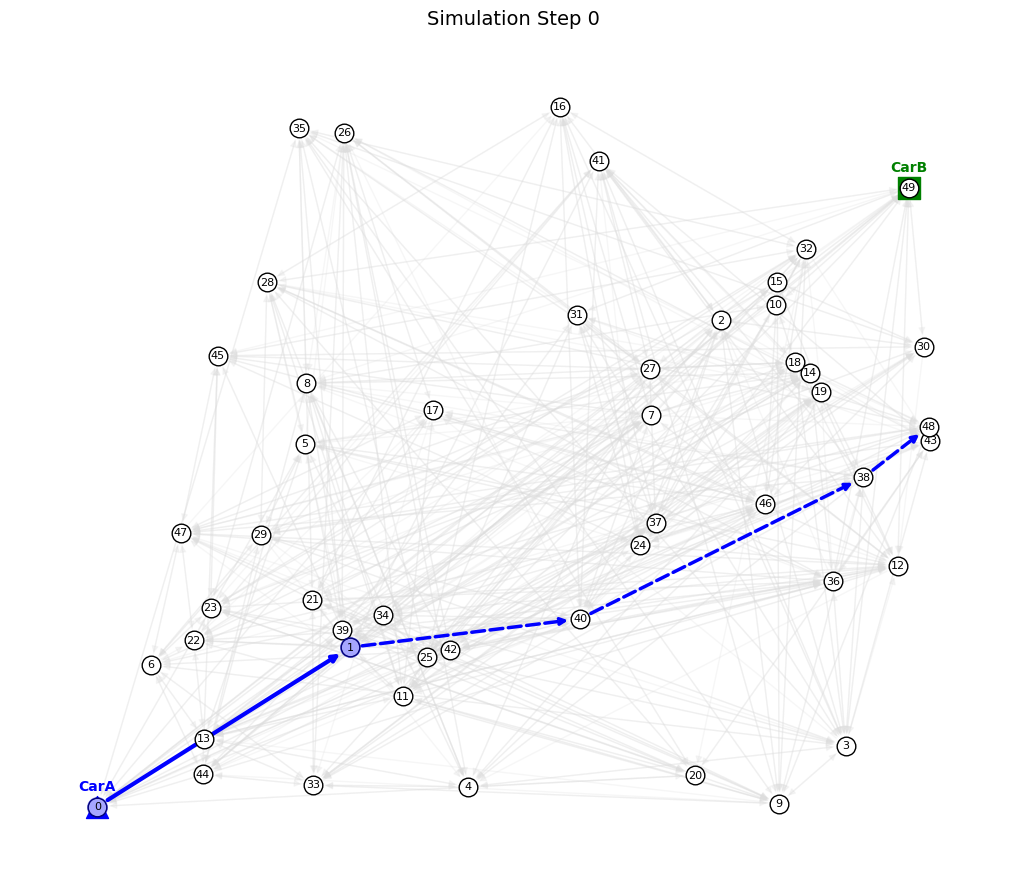

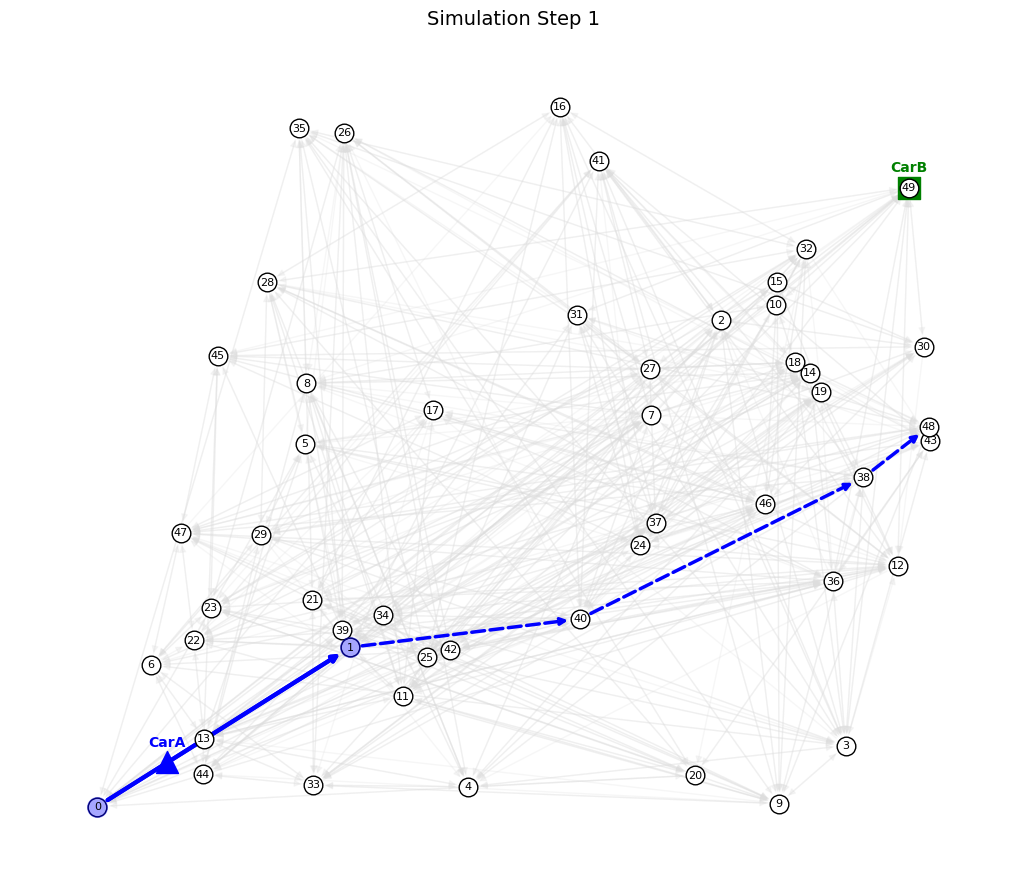

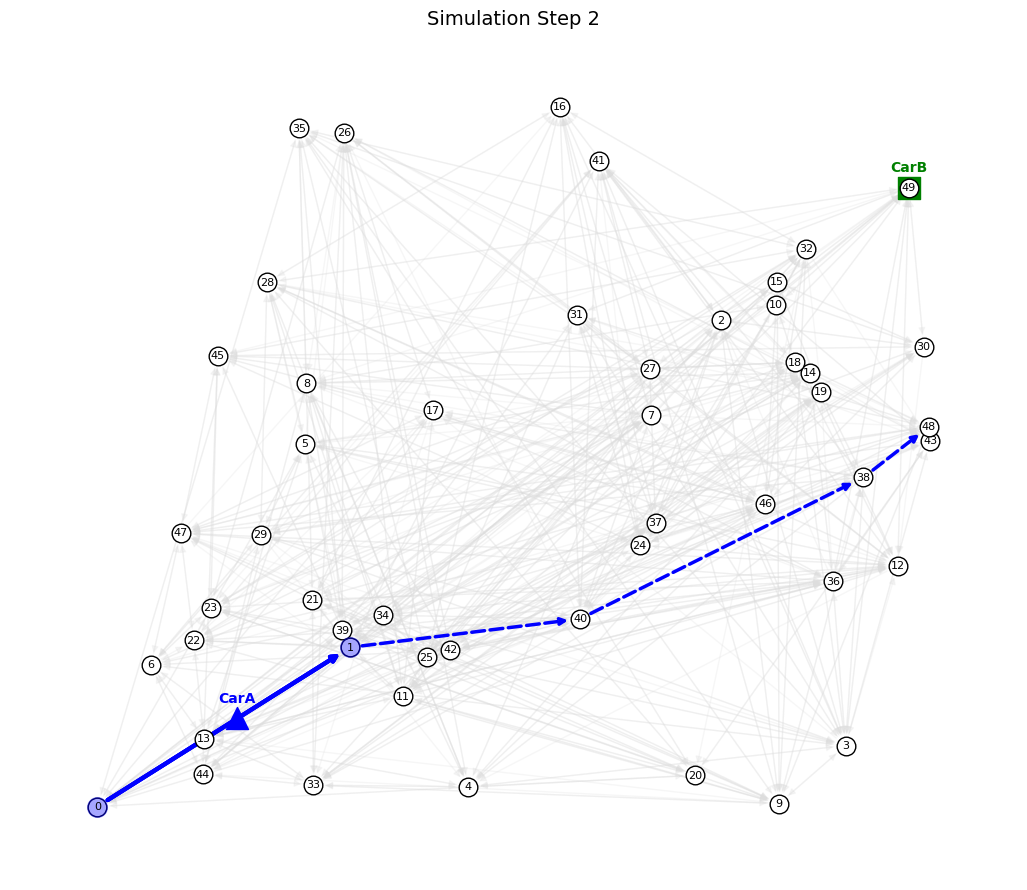

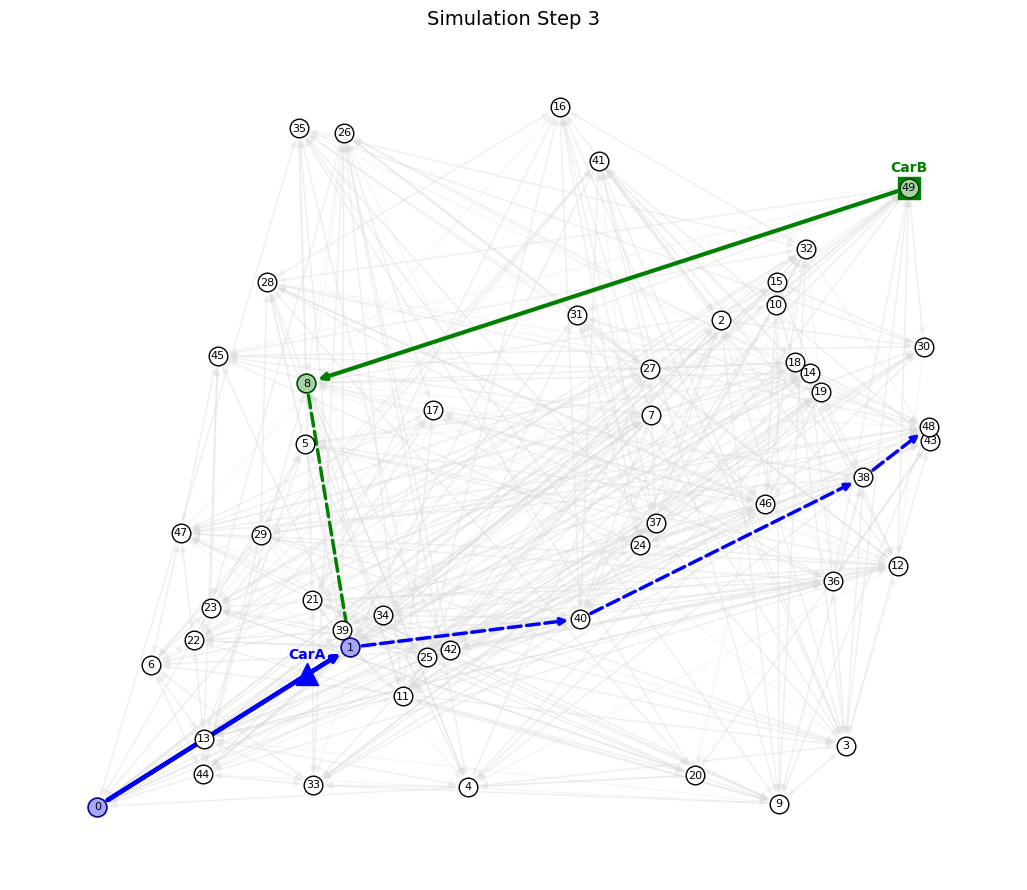

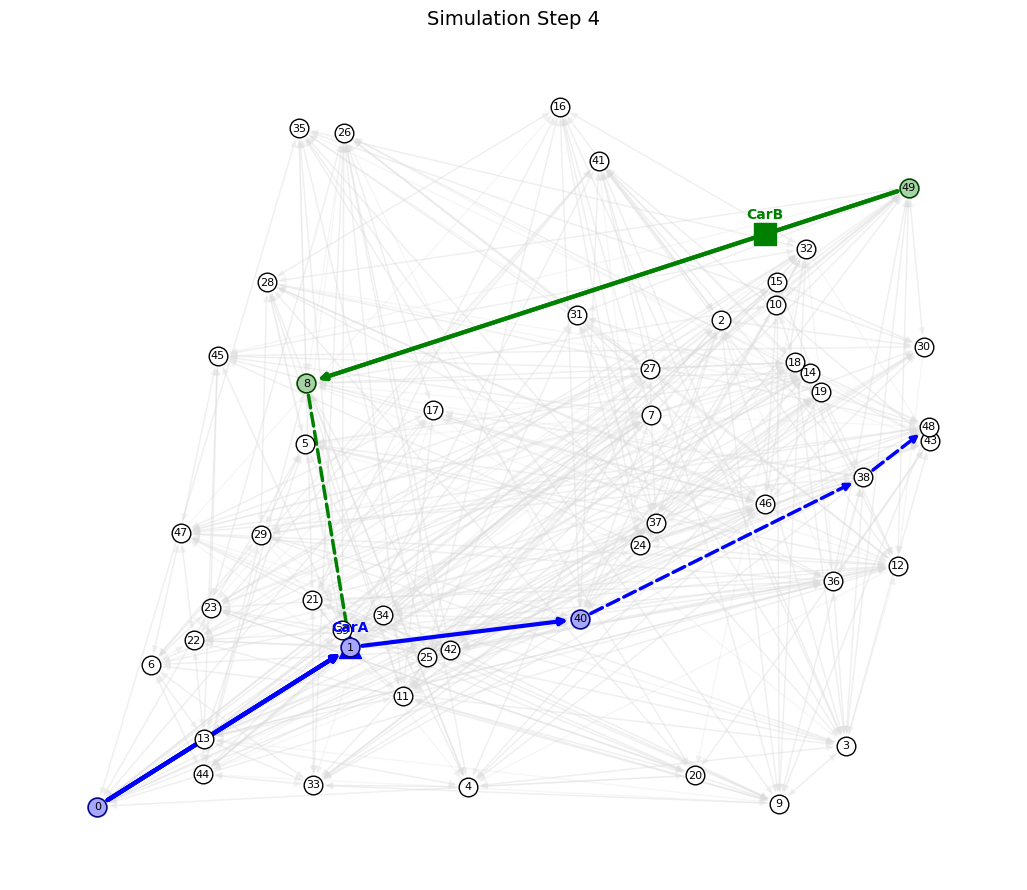

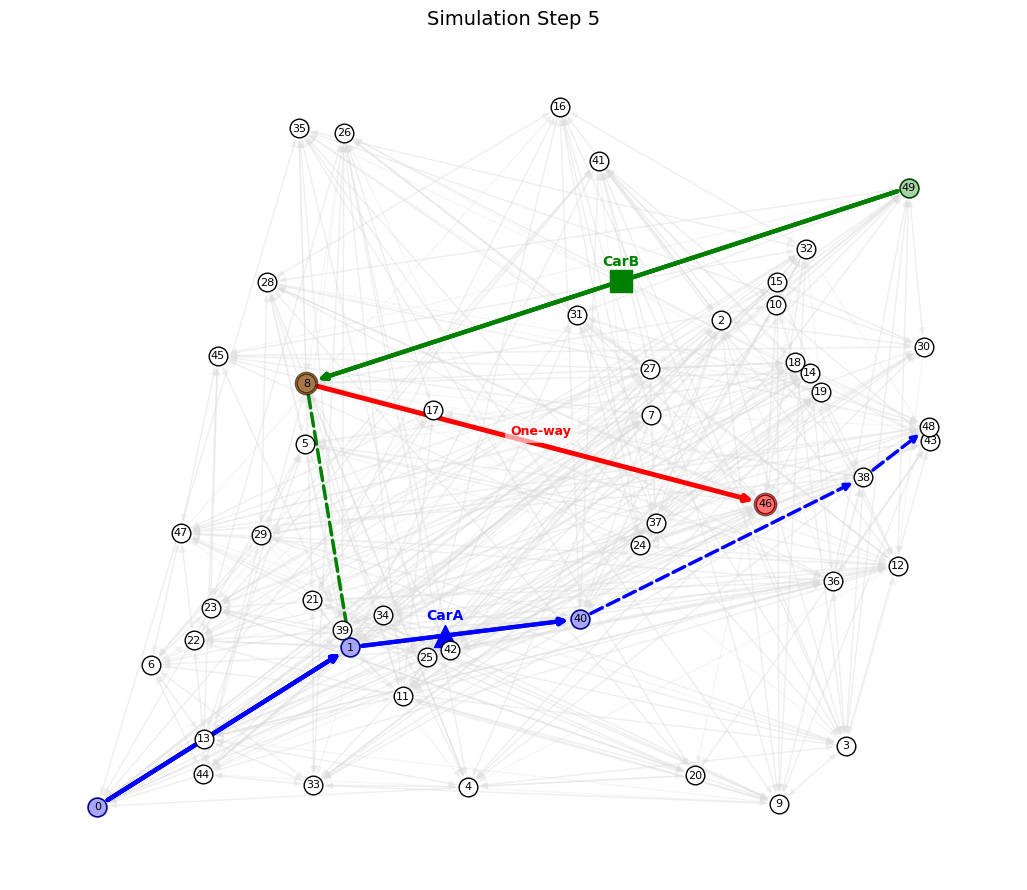

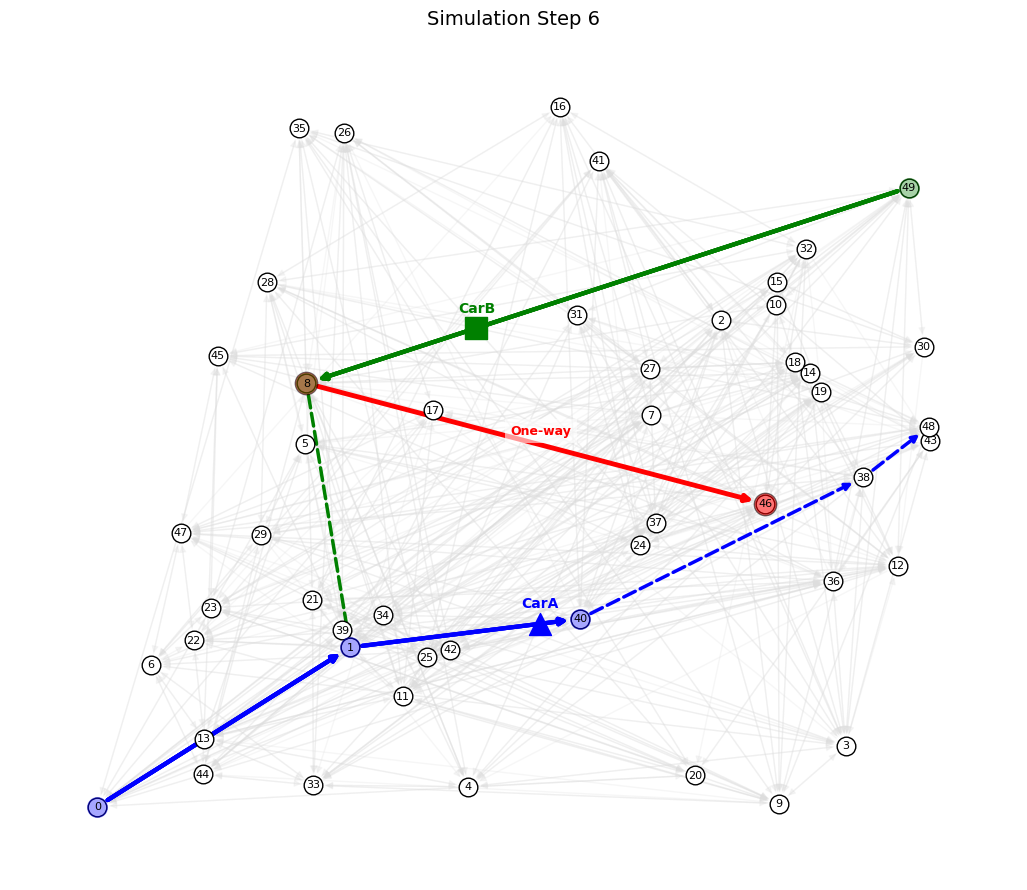

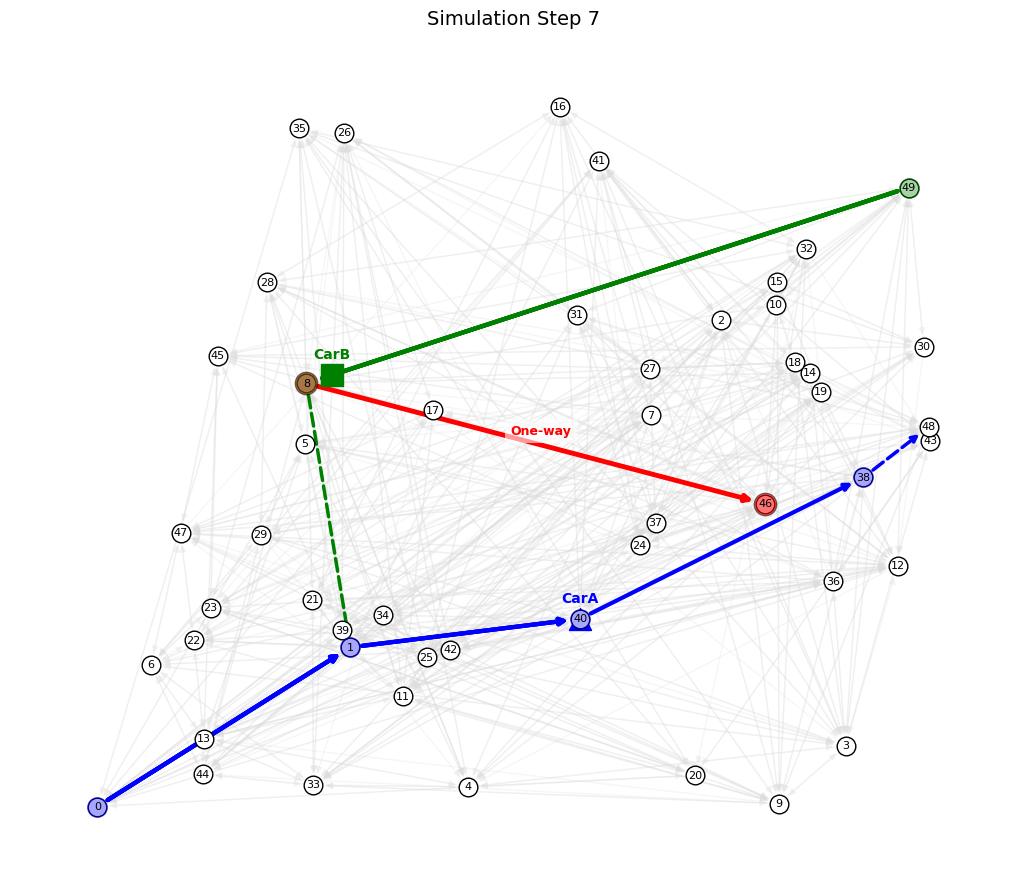

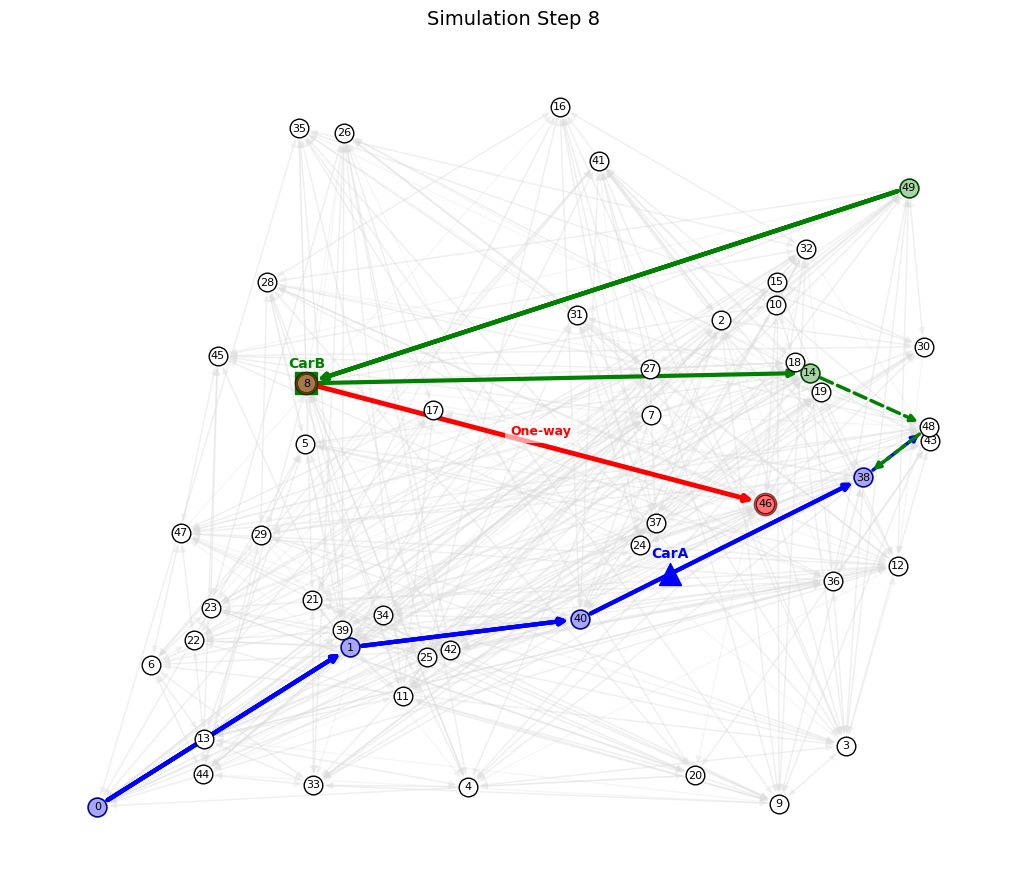

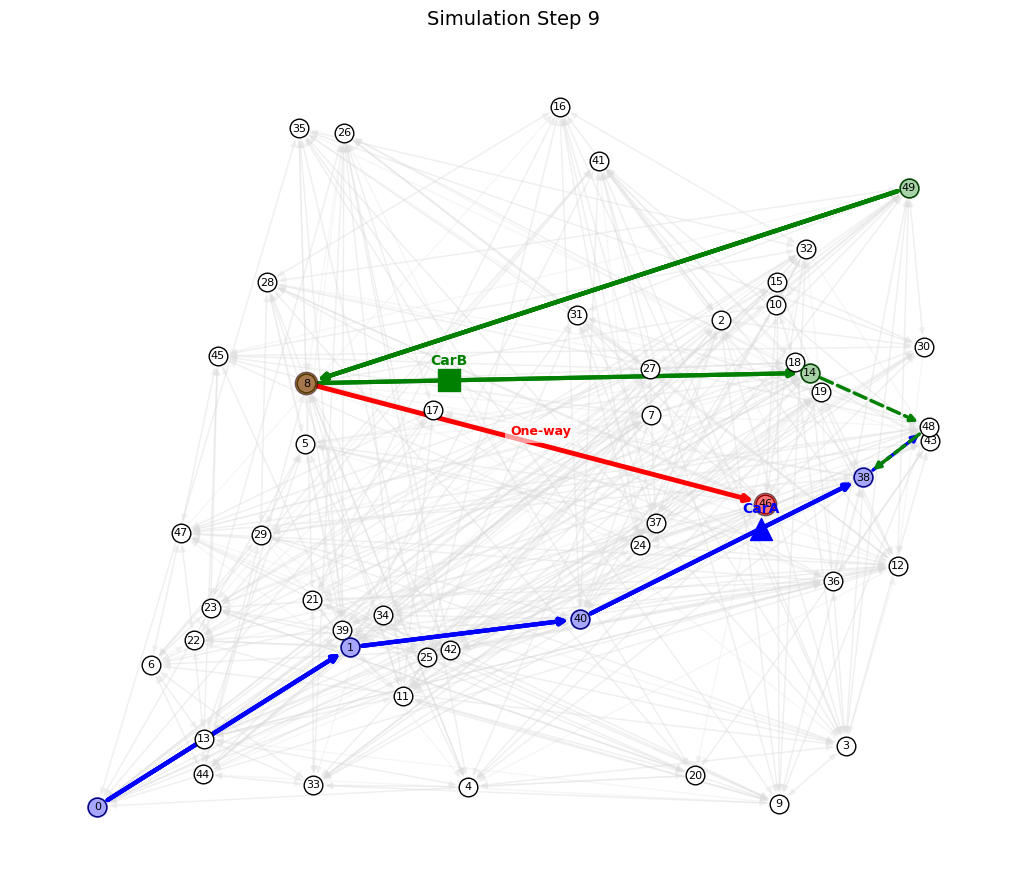

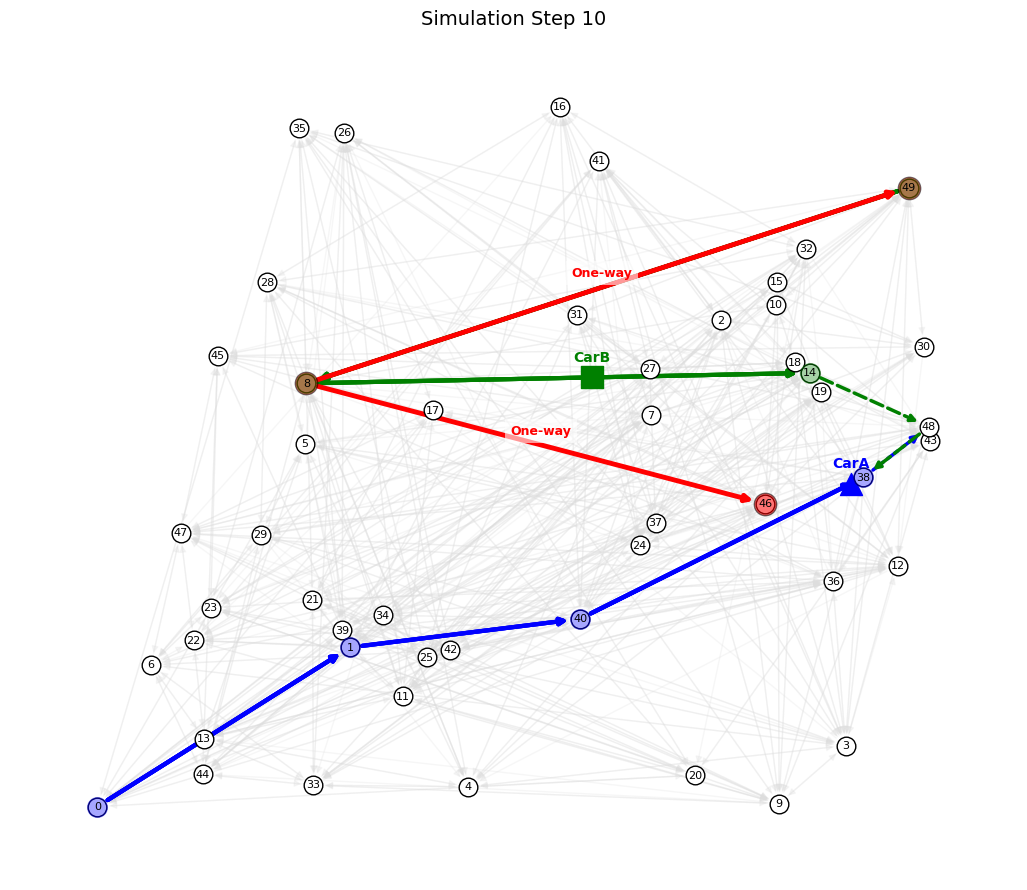

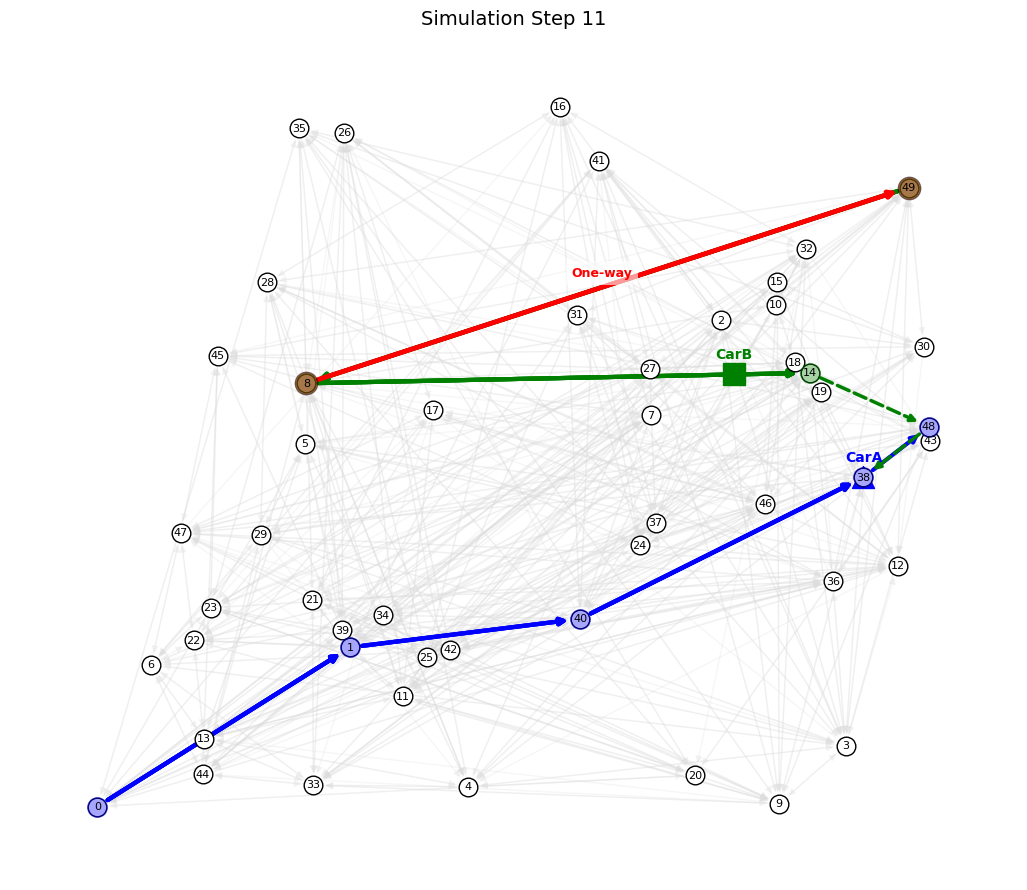

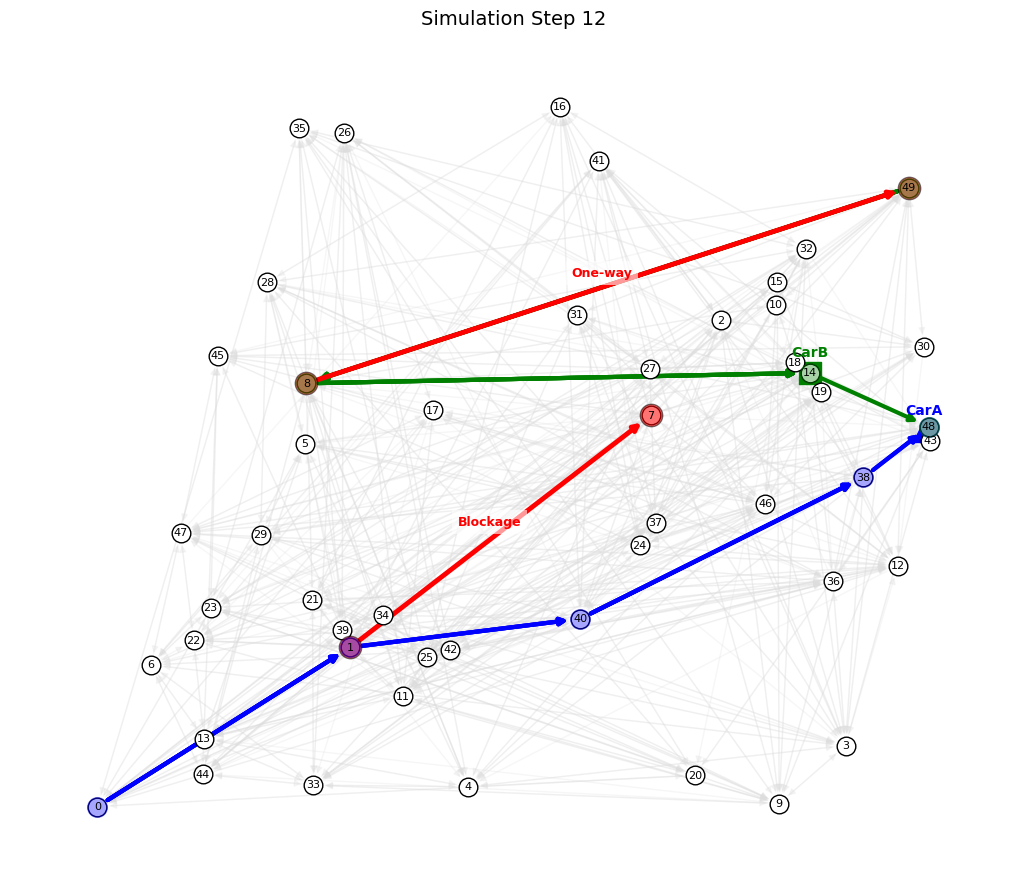

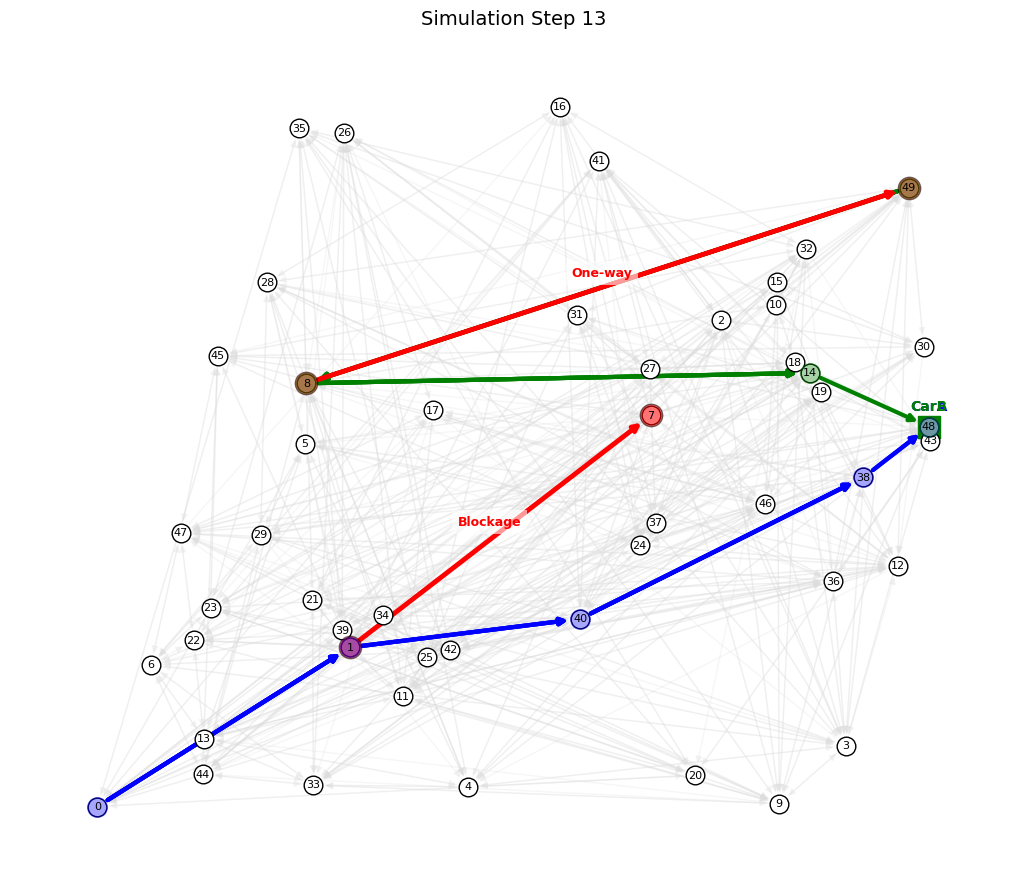

In [60]:
for s in range(len(history)):
    draw_simulation(copy_adjacency, positions, history, step=s)

#**THANK YOU**